# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

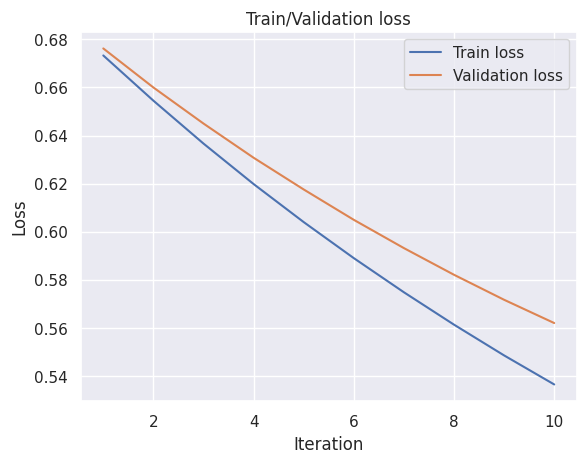

CPU times: user 1.54 s, sys: 224 ms, total: 1.76 s
Wall time: 1.5 s
Train ROC-AUC 0.9492
Valid ROC-AUC 0.9067
Test ROC-AUC 0.8973


In [8]:
boosting = Boosting(plot=True)

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

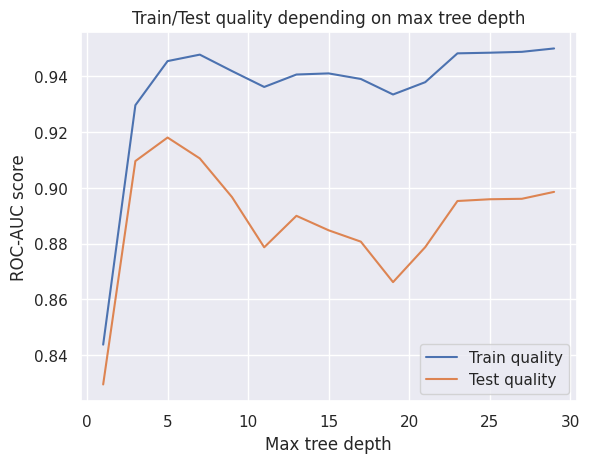

In [9]:
depths = range(1, 30, 2)
train_quality = []
test_quality = []

for depth in depths:
    boosting = Boosting(base_model_params={'max_depth': depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    train_quality.append(boosting.score(x_train, y_train))
    test_quality.append(boosting.score(x_test, y_test))
    
plt.plot(depths, train_quality, label='Train quality')
plt.plot(depths, test_quality, label='Test quality')

plt.xlabel('Max tree depth')
plt.ylabel('ROC-AUC score')
plt.title('Train/Test quality depending on max tree depth')
            
plt.legend()
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

На обучающей выборке с ростом максимальной глубины качество растёт почти до идеального, и дальше остаётся примерно на одном уровне (небольшие скачки, я думаю, связаны со случайно сгенерированной бутстрап выборкой в обучении базовых моделей). На тестовой выборке при росте максимальной глубины качество сначала растёт, достигая своего максимума при глубине 5, а затем начинает падать. Это связано с тем, что при большой глубине базовой модели, бустинг начинает быстро переобучаться и настраиваться не на реальные закономерности в данных, а на шум: отсюда практически идеальное качество на обучающей выборке и ухудшающееся на тестовой.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [39]:
%pip install jupyterlab jupyterlab-optuna

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 6.6 MB/s eta 0:00:00m eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 15.2 MB/s eta 0:00:00m eta 0:00:010:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jupyter_server-2.12.1-py3-none-any.whl (380 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl (6.1 kB)
  Using cached jupyterlab_server-2.25.2-py3-none-any.whl (58 kB)
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
  Using cached jupyter_lsp-2.2.1-py3-none-any.whl (66 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 27.7 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached typing_extensions-4.9.0-py3-none-any.whl (32 kB)
  Using cached overrides-7.4.0-py3-none-any.whl (17 kB)
  Using cached Send2Trash-1.8.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.4/613.4 KB 15.8 MB/s eta 0:00:000:00:01
  Created wheel for jupyterlab-optuna: filename=jupyterlab_optuna-0.1.0-py3-none-any.whl size=3607983 sha256=04279329871635fe0b4544c495c55f9bbef31bc18f766178b6ac68c8bf51952b
  Stored in directory: /home/cutehater/.cache/pip/wheels/9a/9b/ca/eb4257d7ea94f5c94b3117fd9c2cb01076558ec93990308073
Successfully built jupyterlab-optuna


  Attempting uninstall: send2trash
    Found existing installation: Send2Trash 1.8.0
    Uninstalling Send2Trash-1.8.0:
      Successfully uninstalled Send2Trash-1.8.0
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 4.17.3
    Uninstalling jsonschema-4.17.3:
      Successfully uninstalled jsonschema-4.17.3
  Attempting uninstall: jupyter-events
    Found existing installation: jupyter-events 0.6.3
    Uninstalling jupyter-events-0.6.3:
      Successfully uninstalled jupyter-events-0.6.3
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter_server 2.2.1
    Uninstalling jupyter_server-2.2.1:
      Successfully uninstalled jupyter_server-2.2.1
Note: you may need to restart the kernel to use updated packages.


In [14]:
import optuna
import logging
optuna.logging.set_verbosity(optuna.logging.WARNING) #off INFO optuna logs set by default

boosting = Boosting()
boosting.tune_hyperparameters(x_train, y_train, x_valid, y_valid)
boosting.fit(x_train, y_train, x_valid, y_valid)

In [15]:
print(f'Best base_model_params: {boosting.base_model_params}')
print(f'Best n_estimators: {boosting.n_estimators}')
print(f'Best learning_rate: {boosting.learning_rate}')
print(f'Best subsample: {boosting.subsample}')

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

Best base_model_params: {'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 8}
Best n_estimators: 3
Best learning_rate: 0.13645335093212252
Best subsample: 0.9130893505107329
Train ROC-AUC 0.9619
Valid ROC-AUC 0.9326
Test ROC-AUC 0.9301


## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [28]:
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_prob_boosting = boosting.predict_proba(x_test)[:, 1]
y_prob_logreg = logreg.predict_proba(x_test)[:, 1]

prob_true_boosting, prob_pred_boosting = calibration_curve(y_test, y_prob_boosting, n_bins=8)
prob_true_logreg, prob_pred_logreg = calibration_curve(y_test, y_prob_logreg, n_bins=8)

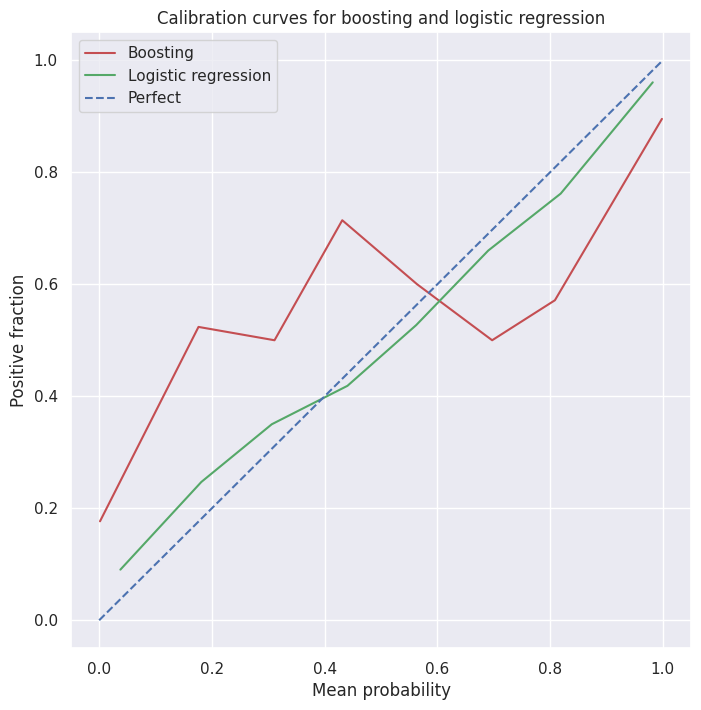

In [29]:
plt.figure(figsize=(8, 8))

plt.plot(prob_pred_boosting, prob_true_boosting, color='r', label='Boosting')
plt.plot(prob_pred_logreg, prob_true_logreg, color='g', label='Logistic regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='b', label='Perfect')

plt.xlabel('Mean probability')
plt.ylabel('Positive fraction')
plt.title('Calibration curves for boosting and logistic regression')
plt.legend()
plt.show()

Получилось, что бустинг немного хуже оценивает вероятности: калибровочная кривая у него менее сглажена и приближена к идеальной, чем у логистической регрессии. 

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

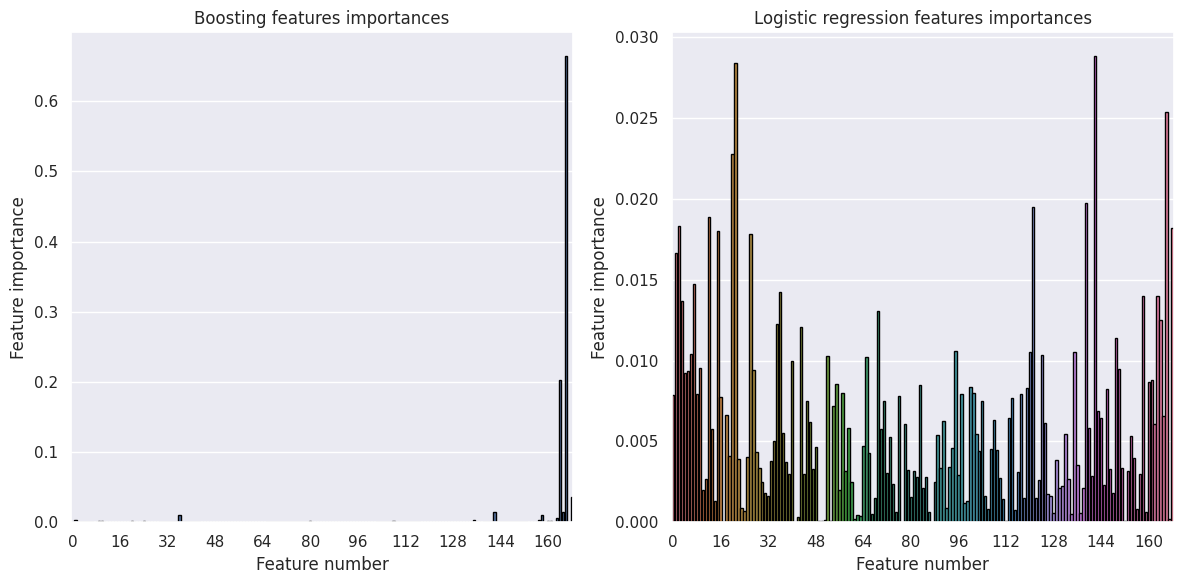

In [37]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  

sns.barplot(boosting.feature_importances_, edgecolor='black')
plt.title('Boosting features importances')
plt.xlabel('Feature number')
plt.ylabel('Feature importance')
num_ticks = 10
indices = np.arange(0, len(boosting.feature_importances_), len(boosting.feature_importances_) // num_ticks)
plt.xticks(indices, indices)

plt.subplot(1, 2, 2)
w_logreg = np.absolute(logreg.coef_)
sns.barplot(w_logreg / np.sum(w_logreg), edgecolor='black')
plt.title('Logistic regression features importances')
plt.xlabel('Feature number')
plt.ylabel('Feature importance')
plt.xticks(indices, indices)

plt.tight_layout()
plt.show()

В бустинге есть всего парочка очень важных для модели признаков, несколько чуть-чуть важных и большинство "шумовых", в то время как в логистической регрессии веса распределены более равномерно. Думаю, так происходит, потому что в логреге есть регуляризация, которая штрафует модель за слишком большие модули весов, в то время как бустинг более "свободен" определять важности весов. Кроме того, в текущих базовых моделях бустинга у нас есть ограничение по глубине дерева, а в одной вершине мы делаем разделение лишь по одному признаку, поэтому некоторые признаки могут и вовсе не участвовать в разделении.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

Сначала попробуем взять все хоть немного видные на графике параметры (то есть с важностью порядка $e^{-2}$ и выше); потом попробуем оставить только совсем хвост самых важных на графике параметров.

In [45]:
best_base_model_params = boosting.base_model_params
best_n_estimators = boosting.n_estimators
best_learning_rate = boosting.learning_rate
best_subsample = boosting.subsample

In [53]:
important_first = [36]
important_first.extend(list(range(142, len(boosting.feature_importances_))))

important_second = list(range(164, len(boosting.feature_importances_)))

In [56]:
boosting = Boosting(base_model_params=best_base_model_params, n_estimators=best_n_estimators, 
                    learning_rate = best_learning_rate, subsample=best_subsample)
boosting.fit(x_train[:, important_first], y_train, x_valid[:, important_first], y_valid)

print(f'Train ROC-AUC {boosting.score(x_train[:, important_first], y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid[:, important_first], y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test[:, important_first], y_test):.4f}')

Train ROC-AUC 0.9446
Valid ROC-AUC 0.9220
Test ROC-AUC 0.9151


In [57]:
boosting = Boosting(base_model_params=best_base_model_params, n_estimators=best_n_estimators, 
                    learning_rate = best_learning_rate, subsample=best_subsample)
boosting.fit(x_train[:, important_second], y_train, x_valid[:, important_second], y_valid)

print(f'Train ROC-AUC {boosting.score(x_train[:, important_second], y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid[:, important_second], y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test[:, important_second], y_test):.4f}')

Train ROC-AUC 0.9436
Valid ROC-AUC 0.9188
Test ROC-AUC 0.9176


В обоих случаях качество на тестовой выборке немного ухудшилось; возможно, после очистки признаков следует подбирать гиперпараметры заново, чтобы добиться лучшего качества.

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [61]:
from sklearn.metrics import roc_auc_score

boosting = Boosting(base_model_params=best_base_model_params, n_estimators=best_n_estimators, 
                    learning_rate = best_learning_rate, subsample=best_subsample)
boosting.fit(x_train, y_train, x_valid, y_valid)

pred_boosting_valid = boosting.predict_proba(x_valid)[:, 1]
pred_logreg_valid = logreg.predict_proba(x_valid)[:, 1]
pred_boosting_test = boosting.predict_proba(x_test)[:, 1]
pred_logreg_test = logreg.predict_proba(x_test)[:, 1]

blend_pred_valid = (pred_boosting_valid + pred_logreg_valid) / 2
blend_pred_test = (pred_boosting_test + pred_logreg_test) / 2

print(f'Valid ROC-AUC {roc_auc_score(y_valid, blend_pred_valid):.4f}')
print(f'Test ROC-AUC {roc_auc_score(y_test, blend_pred_test):.4f}')

Valid ROC-AUC 0.9433
Test ROC-AUC 0.9391


In [62]:
print(f'Valid ROC-AUC {roc_auc_score(y_valid, pred_logreg_valid):.4f}')
print(f'Test ROC-AUC {roc_auc_score(y_test, pred_logreg_test):.4f}')

Valid ROC-AUC 0.9420
Test ROC-AUC 0.9379


Ну кстати! Удалось добиться небольшого улучшения на тесте по сравнению с обоими отдельными моделями, даже в самой простой вариации блендинга. Давайте попробуем ещё поперебирать веса, с которыми брать модельки, на валидационной выборке.

In [64]:
fraction = 100

best_valid_fraction = 1
best_valid_score = 0

for i in range(1, fraction):
    blend_pred_valid = (pred_boosting_valid * i + pred_logreg_valid * (fraction - i)) / fraction

    if (roc_auc_score(y_valid, blend_pred_valid) > best_valid_score):
        best_valid_score = roc_auc_score(y_valid, blend_pred_valid)
        best_valid_fraction = i
        
print(f'Best weights: {(best_valid_fraction / fraction):.4f} for boosting, {((fraction - best_valid_fraction) / fraction):.4f} for logistic regression')
print(f'Valid ROC-AUC {best_valid_score:.4f}')
print(f'Test ROC-AUC {roc_auc_score(y_test, (pred_boosting_test * best_valid_fraction + pred_logreg_test * (fraction - best_valid_fraction)) / fraction):.4f}')

Best weights: 0.6500 for boosting, 0.3500 for logistic regression
Valid ROC-AUC 0.9436
Test ROC-AUC 0.9394


Ну не сильно лучше стало, конечно (но всё-таки чуть чуть стало!), но проверить было интересно.

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [65]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 11.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [67]:
from catboost import CatBoost, Pool, CatBoostClassifier

catboost = CatBoostClassifier()
catboost.fit(x_train, y_train)
catboost_pred = catboost.predict(Pool(x_test, y_test))

print(f'Test ROC-AUC: {roc_auc_score(catboost_pred, y_test):.4f}')

Learning rate set to 0.036078
0:	learn: 0.6491461	total: 5.03ms	remaining: 5.02s
1:	learn: 0.6106101	total: 9.22ms	remaining: 4.6s
2:	learn: 0.5804629	total: 13.7ms	remaining: 4.54s
3:	learn: 0.5522560	total: 18.5ms	remaining: 4.61s
4:	learn: 0.5262195	total: 23.3ms	remaining: 4.64s
5:	learn: 0.5008076	total: 28.1ms	remaining: 4.65s
6:	learn: 0.4812964	total: 32.1ms	remaining: 4.56s
7:	learn: 0.4620364	total: 37.1ms	remaining: 4.6s
8:	learn: 0.4461814	total: 41.5ms	remaining: 4.57s
9:	learn: 0.4303349	total: 46ms	remaining: 4.55s
10:	learn: 0.4142073	total: 50.7ms	remaining: 4.56s
11:	learn: 0.4011999	total: 54.5ms	remaining: 4.48s
12:	learn: 0.3907486	total: 58.5ms	remaining: 4.44s
13:	learn: 0.3808040	total: 62.4ms	remaining: 4.4s
14:	learn: 0.3710193	total: 66.1ms	remaining: 4.34s
15:	learn: 0.3641415	total: 69.9ms	remaining: 4.3s
16:	learn: 0.3554514	total: 73.8ms	remaining: 4.27s
17:	learn: 0.3492319	total: 77.5ms	remaining: 4.23s
18:	learn: 0.3419545	total: 81.2ms	remaining: 4.19

184:	learn: 0.2105937	total: 782ms	remaining: 3.44s
185:	learn: 0.2104135	total: 786ms	remaining: 3.44s
186:	learn: 0.2102394	total: 790ms	remaining: 3.43s
187:	learn: 0.2100739	total: 794ms	remaining: 3.43s
188:	learn: 0.2098812	total: 798ms	remaining: 3.42s
189:	learn: 0.2096841	total: 802ms	remaining: 3.42s
190:	learn: 0.2095743	total: 805ms	remaining: 3.41s
191:	learn: 0.2093934	total: 810ms	remaining: 3.41s
192:	learn: 0.2092936	total: 813ms	remaining: 3.4s
193:	learn: 0.2091520	total: 817ms	remaining: 3.39s
194:	learn: 0.2090295	total: 821ms	remaining: 3.39s
195:	learn: 0.2087621	total: 825ms	remaining: 3.38s
196:	learn: 0.2085897	total: 829ms	remaining: 3.38s
197:	learn: 0.2084738	total: 833ms	remaining: 3.38s
198:	learn: 0.2083127	total: 837ms	remaining: 3.37s
199:	learn: 0.2081942	total: 841ms	remaining: 3.36s
200:	learn: 0.2080461	total: 845ms	remaining: 3.36s
201:	learn: 0.2078812	total: 848ms	remaining: 3.35s
202:	learn: 0.2077163	total: 852ms	remaining: 3.34s
203:	learn: 0

387:	learn: 0.1861226	total: 1.57s	remaining: 2.48s
388:	learn: 0.1860143	total: 1.57s	remaining: 2.47s
389:	learn: 0.1859784	total: 1.58s	remaining: 2.47s
390:	learn: 0.1858827	total: 1.58s	remaining: 2.46s
391:	learn: 0.1857574	total: 1.59s	remaining: 2.46s
392:	learn: 0.1856661	total: 1.59s	remaining: 2.46s
393:	learn: 0.1855881	total: 1.59s	remaining: 2.45s
394:	learn: 0.1854824	total: 1.6s	remaining: 2.45s
395:	learn: 0.1854377	total: 1.6s	remaining: 2.45s
396:	learn: 0.1853819	total: 1.61s	remaining: 2.44s
397:	learn: 0.1853196	total: 1.61s	remaining: 2.44s
398:	learn: 0.1852688	total: 1.61s	remaining: 2.43s
399:	learn: 0.1852021	total: 1.62s	remaining: 2.43s
400:	learn: 0.1851381	total: 1.62s	remaining: 2.42s
401:	learn: 0.1850541	total: 1.63s	remaining: 2.42s
402:	learn: 0.1849947	total: 1.63s	remaining: 2.42s
403:	learn: 0.1849372	total: 1.63s	remaining: 2.41s
404:	learn: 0.1849045	total: 1.64s	remaining: 2.41s
405:	learn: 0.1848165	total: 1.64s	remaining: 2.4s
406:	learn: 0.1

581:	learn: 0.1739135	total: 2.36s	remaining: 1.7s
582:	learn: 0.1739061	total: 2.36s	remaining: 1.69s
583:	learn: 0.1738362	total: 2.37s	remaining: 1.69s
584:	learn: 0.1737531	total: 2.37s	remaining: 1.68s
585:	learn: 0.1737411	total: 2.38s	remaining: 1.68s
586:	learn: 0.1736648	total: 2.38s	remaining: 1.67s
587:	learn: 0.1735998	total: 2.38s	remaining: 1.67s
588:	learn: 0.1735571	total: 2.39s	remaining: 1.67s
589:	learn: 0.1735141	total: 2.39s	remaining: 1.66s
590:	learn: 0.1734409	total: 2.4s	remaining: 1.66s
591:	learn: 0.1733955	total: 2.4s	remaining: 1.65s
592:	learn: 0.1733524	total: 2.4s	remaining: 1.65s
593:	learn: 0.1732918	total: 2.41s	remaining: 1.65s
594:	learn: 0.1732510	total: 2.41s	remaining: 1.64s
595:	learn: 0.1731994	total: 2.42s	remaining: 1.64s
596:	learn: 0.1731304	total: 2.42s	remaining: 1.63s
597:	learn: 0.1730979	total: 2.42s	remaining: 1.63s
598:	learn: 0.1730484	total: 2.43s	remaining: 1.63s
599:	learn: 0.1730145	total: 2.43s	remaining: 1.62s
600:	learn: 0.17

782:	learn: 0.1645084	total: 3.15s	remaining: 872ms
783:	learn: 0.1644548	total: 3.15s	remaining: 869ms
784:	learn: 0.1644036	total: 3.16s	remaining: 865ms
785:	learn: 0.1643706	total: 3.16s	remaining: 861ms
786:	learn: 0.1643015	total: 3.17s	remaining: 857ms
787:	learn: 0.1642534	total: 3.17s	remaining: 853ms
788:	learn: 0.1642216	total: 3.17s	remaining: 849ms
789:	learn: 0.1641748	total: 3.18s	remaining: 845ms
790:	learn: 0.1641290	total: 3.18s	remaining: 841ms
791:	learn: 0.1641213	total: 3.19s	remaining: 837ms
792:	learn: 0.1640670	total: 3.19s	remaining: 833ms
793:	learn: 0.1640200	total: 3.19s	remaining: 829ms
794:	learn: 0.1639682	total: 3.2s	remaining: 825ms
795:	learn: 0.1639345	total: 3.2s	remaining: 821ms
796:	learn: 0.1639137	total: 3.21s	remaining: 817ms
797:	learn: 0.1638860	total: 3.21s	remaining: 813ms
798:	learn: 0.1638463	total: 3.21s	remaining: 809ms
799:	learn: 0.1638015	total: 3.22s	remaining: 804ms
800:	learn: 0.1637929	total: 3.22s	remaining: 800ms
801:	learn: 0.

975:	learn: 0.1574069	total: 3.94s	remaining: 96.8ms
976:	learn: 0.1573693	total: 3.94s	remaining: 92.8ms
977:	learn: 0.1573369	total: 3.94s	remaining: 88.7ms
978:	learn: 0.1572957	total: 3.95s	remaining: 84.7ms
979:	learn: 0.1572500	total: 3.95s	remaining: 80.7ms
980:	learn: 0.1572255	total: 3.96s	remaining: 76.7ms
981:	learn: 0.1571913	total: 3.96s	remaining: 72.6ms
982:	learn: 0.1571491	total: 3.96s	remaining: 68.6ms
983:	learn: 0.1571201	total: 3.97s	remaining: 64.5ms
984:	learn: 0.1570776	total: 3.97s	remaining: 60.5ms
985:	learn: 0.1570123	total: 3.98s	remaining: 56.5ms
986:	learn: 0.1569611	total: 3.98s	remaining: 52.4ms
987:	learn: 0.1569344	total: 3.98s	remaining: 48.4ms
988:	learn: 0.1569239	total: 3.99s	remaining: 44.4ms
989:	learn: 0.1568935	total: 3.99s	remaining: 40.3ms
990:	learn: 0.1568503	total: 4s	remaining: 36.3ms
991:	learn: 0.1567690	total: 4s	remaining: 32.3ms
992:	learn: 0.1567322	total: 4s	remaining: 28.2ms
993:	learn: 0.1567167	total: 4.01s	remaining: 24.2ms
99

Получилось похуже, чем в нашей реализации бустинга, ну я думаю, потому что я взяла самую базовую версию катбуста, а если поподбирать гиперпараметры, то можно добиться гораздо лучшего качества.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?

In [71]:
%%HTML
<iframe src="https://www.youtube.com/embed/uUSjpbaM_4s"></iframe>

Эта домашка научила меня, как загружать шортсы на ютуб!!! Теперь стану популярным шортсером и уйду нафик из айти.

Если честно, в следующем году хотелось бы понять, что мне делать в жизни. Потому что сейчас я абсолютно не уверена в своих выборах ни в профессиональной сфере, ни в личной жизни. 

Последний месяц по ночам я постоянно чувствовала себя настолько тревожно, что впервые в жизни начала пить транквилизаторы. Надеюсь, в следующем году я успешно от них откажусь, а ещё стану чуть ближе к счастью, гармонии с собой и пониманию себя.

Искренне надеюсь, что в следующем году что-то улучшится в политической ситуации в России (хотя и не жду этого), всё-таки хотя бы выборы будут. Думаю, в этом плане будет не менее весело, чем в последние два года. Да не придут ко мне за этот абзац выламывать дверь дяди с автоматами (у проверяющего было дело, насколько я знаю...)

Ну и традиционное:

*Я всё исправлю, починю и налажу*

*Если снег новогодний на прошлогодние грабли не ляжет*

*Так что я не замечу до боли знакомых зубцов под подошвой*

*Если следующий год, как всегда, снова вдруг не окажется прошлым*